## 1) Primera Parte: Crear el Modelo

In [1]:
# Aquí se importan numpy para manejar los arreglos y matplotlib para poder graficar
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

In [2]:
df = pd.read_csv('data.txt', delimiter=',', header=None)

# size_array_train es el x o el input
size_array_train = df.iloc[:, 0].to_numpy()

# price_array_train es el y o el valor real
price_array_train = df.iloc[:, 2].to_numpy()

print(f"x_train = {size_array_train}")
print(f"y_train = {price_array_train}")

x_train = [2104 1600 2400 1416 3000 1985 1534 1427 1380 1494 1940 2000 1890 4478
 1268 2300 1320 1236 2609 3031 1767 1888 1604 1962 3890 1100 1458 2526
 2200 2637 1839 1000 2040 3137 1811 1437 1239 2132 4215 2162 1664 2238
 2567 1200  852 1852 1203]
y_train = [399900 329900 369000 232000 539900 299900 314900 198999 212000 242500
 239999 347000 329999 699900 259900 449900 299900 199900 499998 599000
 252900 255000 242900 259900 573900 249900 464500 469000 475000 299900
 349900 169900 314900 579900 285900 249900 229900 345000 549000 287000
 368500 329900 314000 299000 179900 299900 239500]


## Número de datos de entrenamiento `m`

- `m` es el tamaño del set de datos de entrenamiento.

- Para hallar su valor con los arreglos de Numpy usamos:
  ```python
  size_array_train.shape[0]

- Esto nos devuelve la cantidad de parejas x,y que hay en nuestro modelo.


In [3]:
# m es el número de datos de entrenamiento
print(f"x_train.shape: {size_array_train.shape}")
m = size_array_train.shape[0]
print(f"El número de datos de entrenamiento es: {m}")

x_train.shape: (47,)
El número de datos de entrenamiento es: 47


## Datos de entrenamiento \(x^i, y^i\)

Armaremos las parejas \(x^i, y^i\) de los datos de entrenamiento.

- Esto significa que la primera pareja será \(x^0, y^0\) y esta corresponde a un valor dado por:
  ```python
  size_array_train[0], price_array_train[0]

- Continuaremos de esta manera hasta completar todas las parejas.

In [4]:
for i in range(len(size_array_train)):
    x_i = size_array_train[i]
    y_i = price_array_train[i]
    print(f"(x^({i}), y^({i})) = ({x_i}, {y_i})")

(x^(0), y^(0)) = (2104, 399900)
(x^(1), y^(1)) = (1600, 329900)
(x^(2), y^(2)) = (2400, 369000)
(x^(3), y^(3)) = (1416, 232000)
(x^(4), y^(4)) = (3000, 539900)
(x^(5), y^(5)) = (1985, 299900)
(x^(6), y^(6)) = (1534, 314900)
(x^(7), y^(7)) = (1427, 198999)
(x^(8), y^(8)) = (1380, 212000)
(x^(9), y^(9)) = (1494, 242500)
(x^(10), y^(10)) = (1940, 239999)
(x^(11), y^(11)) = (2000, 347000)
(x^(12), y^(12)) = (1890, 329999)
(x^(13), y^(13)) = (4478, 699900)
(x^(14), y^(14)) = (1268, 259900)
(x^(15), y^(15)) = (2300, 449900)
(x^(16), y^(16)) = (1320, 299900)
(x^(17), y^(17)) = (1236, 199900)
(x^(18), y^(18)) = (2609, 499998)
(x^(19), y^(19)) = (3031, 599000)
(x^(20), y^(20)) = (1767, 252900)
(x^(21), y^(21)) = (1888, 255000)
(x^(22), y^(22)) = (1604, 242900)
(x^(23), y^(23)) = (1962, 259900)
(x^(24), y^(24)) = (3890, 573900)
(x^(25), y^(25)) = (1100, 249900)
(x^(26), y^(26)) = (1458, 464500)
(x^(27), y^(27)) = (2526, 469000)
(x^(28), y^(28)) = (2200, 475000)
(x^(29), y^(29)) = (2637, 299900)


## Graficar los datos

Para mostrar la gráfica de los datos, utilizamos el método `scatter()` de Matplotlib.


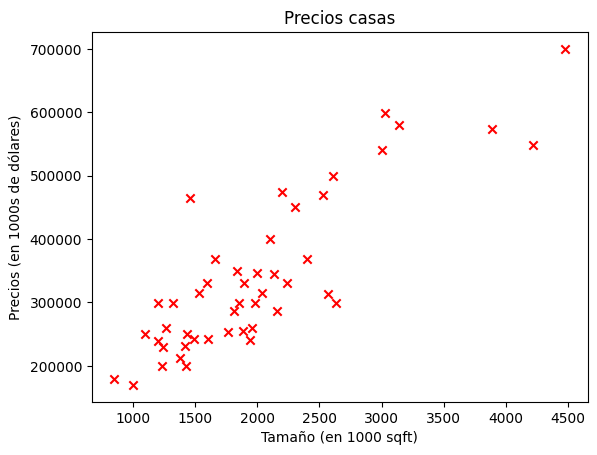

In [5]:
# Plot the data points
plt.scatter(size_array_train, price_array_train, marker='x', c='r')
# Set the title
plt.title("Precios casas")
# Set the y-axis label
plt.ylabel('Precios (en 1000s de dólares)')
# Set the x-axis label
plt.xlabel('Tamaño (en 1000 sqft)')
plt.show()

## Plantear Modelo Lineal

La fórmula de nuestro modelo lineal está dada por:

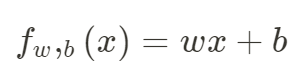
- Esta es una función lineal, por lo que, \( w \) es la pendiente de la función y \( b \) es el punto de intersección de la recta con el eje y
- Para probar el modelo, asignaremos un valor al azar para \( w \) y \( b \). Puedes ajustar estos valores según lo consideres necesario:

In [6]:
w = 225
b = 2
print(f"w: {w}")
print(f"b: {b}")

w: 225
b: 2


## Computar las predicciones para todos los x del set

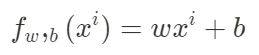

- Para esto tendremos que acceder al arreglo de los input `x` y calcular uno por uno su valor `ŷ` o sea, el valor que resulta evaluar f(x)
- Luego guardaremos cada `ŷ` calculado en otro arreglo

In [7]:
def compute_model_output(x, w, b):
    """
    Computa la función o el modelo lineal
    Args:
      x (ndarray (m,)): Arrelo de Numpy -> Valores x de entrenamiento
      w,b (escalares)    : Parámetros del modelo
    Returns
      y (ndarray (m,)): Arreglo de Numpy -> Las predicciones del modelo
    """

    m = x.shape[0]
    f_wb = np.zeros(m) # Es un arreglo Numpy de tamaño (m)
    for i in range(m):
        # Completa el código
        y_predecido = w*x[i] + b 
        f_wb[i] = y_predecido
    return f_wb

## Veamos cómo quedó nuestro modelo

[ 473402.  360002.  540002.  318602.  675002.  446627.  345152.  321077.
  310502.  336152.  436502.  450002.  425252. 1007552.  285302.  517502.
  297002.  278102.  587027.  681977.  397577.  424802.  360902.  441452.
  875252.  247502.  328052.  568352.  495002.  593327.  413777.  225002.
  459002.  705827.  407477.  323327.  278777.  479702.  948377.  486452.
  374402.  503552.  577577.  270002.  191702.  416702.  270677.]


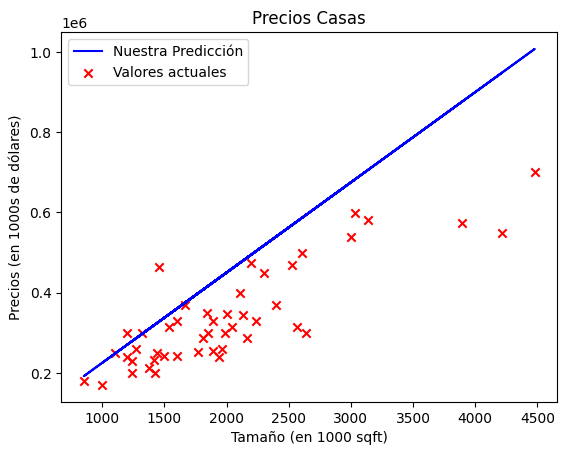

In [8]:
tmp_f_wb = compute_model_output(size_array_train, w, b,)
print(tmp_f_wb)

# Plot our model prediction
plt.plot(size_array_train, tmp_f_wb, c='b',label='Nuestra Predicción')

# Plot the data points
plt.scatter(size_array_train, price_array_train, marker='x', c='r',label='Valores actuales')

# Set the title
plt.title("Precios Casas")
# Set the y-axis label
plt.ylabel('Precios (en 1000s de dólares)')
# Set the x-axis label
plt.xlabel('Tamaño (en 1000 sqft)')
plt.legend()
plt.show()

**La curva no está muy ajustada a los datos**

Vamos a ver cómo podemos mejorarlo

## Respuesta Esperada:

Para w: 225 y b: 2

La gráfica sería:

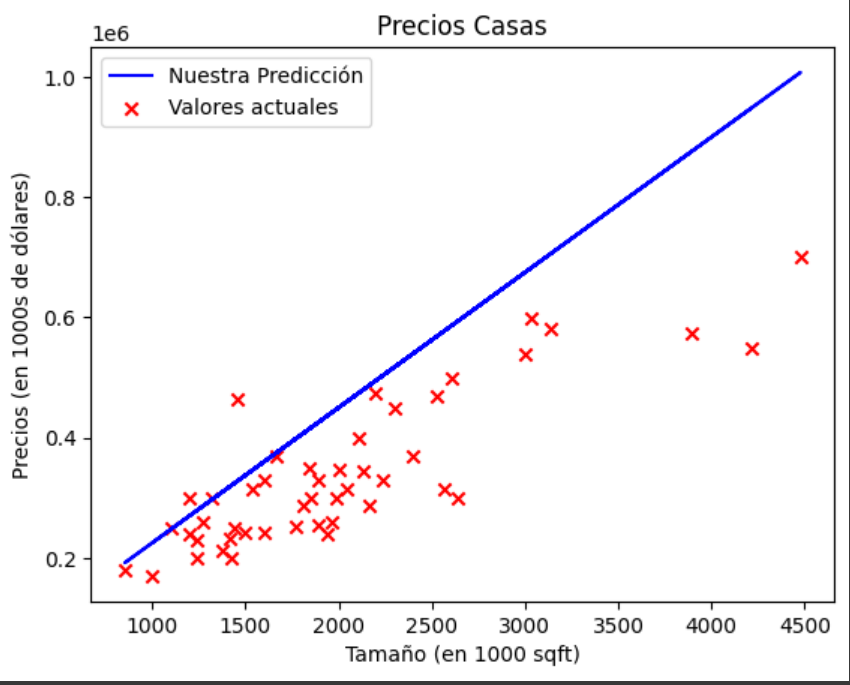

## 2) Segunda Parte: Calcular Función de Costo

## Error
- `y` es el valor que real que corresponde a x, está en el set de entrenamiento
- `ŷ` es el valor que resulta de evaular un x, en la función o el modelo f(x)
- `y` no es lo mismo que `ŷ`, por lo que `ŷ - y` es diferente de 0
- Pero si nuestra predicción `ŷ` es buena, entonces debe ser muy parecida a `y`, por lo que `ŷ - y` debería ser muy cercana a 0
- `ŷ - y` es nuestro error
- Para fines practios diremos que el erro se da por: `(ŷ - y)^2`

## Computar el erro del modelo
- Para encontrar el error de todo el modelo usaremos:

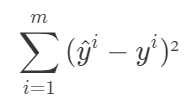

- Teniendo en cuenta que `m`es la cantidad de `x`en el set de entrenamiento


**Recordemos que `ŷ = f(x)` ya que es el arreglo de las predicciones resultantes, al evaluar cada x del set**

- Reemplazando quedaría:

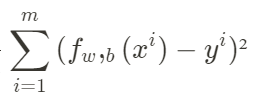

## Función de costo cuadrática

- Esta es una función cuadrática (Segundo Grado), que se representa como `J(w,b)`
- `J(w,b)` es igual al promedio del error de toda la función o sea:

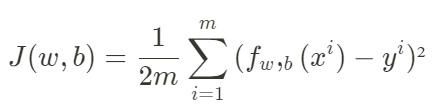

- Nuestro objetivo es hacer que `J(w,b)` sea lo más cercano a 0, ya que, esto implica que, el promedio de la suma de todo el error de nuestro  modelo tiende a 0, o en otras palabras, que nuestras predicciones se acercan mucho a los valores de entrenamiento

In [20]:
def compute_cost(x, y, w, b):
    """
    Computa la función de costo para todo el modelo

    Args:
      x (ndarray (m,)): Arrelo de Numpy -> Valores x de entrenamiento
      y (ndarray (m,)): Arrelo de Numpy -> Valores y de entrenamiento
      w,b (escalares)    : Parámetros del modelo

    Returns
        total_cost (float): El costo total de la función usando los w,b escogidos
    """
    m = x.shape[0]
    cost = 0
    y_predicted_array = compute_model_output(x, w, b)
    for i in range(m):
        # Completa el código
        cost += (y_predicted_array[i] - y[i])**2
    total_cost = (1 / (2 * m)) * cost

    return total_cost

In [21]:
compute_cost(size_array_train, price_array_train, w, b)

10609686392.712767

## 3) Tercera Parte: Gradient Descent

- Este algoritmo nos ayuda a encontrar los valores `w,b` que nos dan el valor mínimo de la función de costo `J`
- El objetivo de este algorimo, es encontrar el mínimo para la función `J`
- Como nuestra función `J` es cuadrática, solo tendrá un mínimo, pero otras funciones de costo podrán tener varios mínimos locales

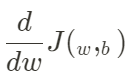## Cálculo del gradiente

- El gradiente se representa como:

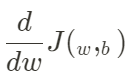 y 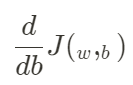

- Es la derivada parcial, por cada parámetro, de la función de costo J
- Este valor le da la dirección y magnitud al algoritmo, actualizando el valor de los parámetros w,b con el finde encontrar el mínimo

**Demonstración en el pdf de las notas**

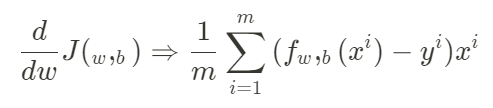


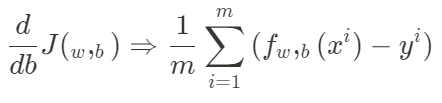

In [11]:
def compute_gradient(x, y, w, b):
    """
    Computa el gradiente de cada parámetro, para el modelo lineal
    Args:
      x (ndarray (m,)): Arrelo de Numpy -> Valores x de entrenamiento
      y (ndarray (m,)): Arrelo de Numpy -> Valores y de entrenamiento
      w,b (escalares)    : Parámetros del modelo
    Returns
      dj_dw (scalar): El gradiente del costo del parámetro w
      dj_db (scalar): El gradiente del costo del parámetro b
     """

    m = x.shape[0]
    dj_dw = 0
    dj_db = 0
    sumatoria_dj_dw = 0
    sumatoria_dj_db = 0
    y_predicted_array = compute_model_output(x, w, b)
    for i in range(m):
        # Completa el código
        sumatoria_dj_dw += (y_predicted_array[i] - y[i])*x[i]
        sumatoria_dj_db += y_predicted_array[i] - y[i]
    dj_dw = (1/m)*sumatoria_dj_dw 
    dj_db = (1/m)*sumatoria_dj_db

    return dj_dw, dj_db

## Gradient Descent

- Este algoritmo se define como:

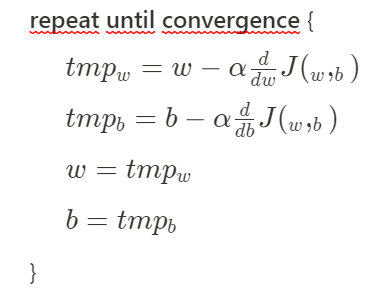

- Es un algoritmo que nos permite hallar los valores w,b para los cuales la función J(w,b) tiene un mínimo
- La derivada parcial es el gradiente de la función de costo
- Alpha es la tasa de aprendizaje


- Entre más iteraciones se hagan, más exacto quedará el modelo

In [12]:
def gradient_descent(x, y, w_in, b_in, alpha, num_iters, cost_function, gradient_function):
    """
    Implementa el algoritmo de gradient descent

    Args:
      x (ndarray (m,))  : Arrelo de Numpy -> Valores x de entrenamiento
      y (ndarray (m,))  : Arrelo de Numpy -> Valores y de entrenamiento
      w_in,b_in (scalar): Valores iniciales para los parámetros del modelo
      alpha (float):      Tasa de Aprendizaje
      num_iters (int):   Número de iteraciones del algoritmo (Esto representa las iteraciones hasta que la función converja)
      cost_function:     Función que computa la función de costo para todo el modelo
      gradient_function: Función que computa el gradiente de cada parámetro, para el modelo lineal

    Returns:
      w (scalar): Valor del parámetro w, después del algoritmo, debería ser el w ideal
      b (scalar): Valor del parámetro b, después del algoritmo, debería ser el b ideal
      """

    b = b_in
    w = w_in

    for i in range(num_iters):
        # Calculate the gradient and update the parameters using gradient_function
        dj_dw, dj_db = gradient_function(x, y, w, b)
        tmp_w = w - alpha*dj_dw
        tmp_b = b - alpha*dj_db

        # Actualiza los valores para los parámetros w, b usando el algoritmo explicado
        b = tmp_b
        w = tmp_w

    return w, b

## Miremos cómo queda nuestros w,b con 10 iteraciones

In [13]:
# parámetros iniciales
w_init = 0
b_init = 0
# número interaciones
iterations = 10
# tasa de aprendizaje
tmp_alpha = 8.0e-1
# algoritmo
w_final, b_final = gradient_descent(size_array_train,price_array_train, w_init, b_init, tmp_alpha,
                                                    iterations, compute_cost, compute_gradient)
print(f"(w,b) Tu modelo encontró: ({w_final:8.4f},{b_final:8.4f})")
print(f"(w,b) La respuesta esperada es: (-78813152290553112885196674896329468663114001254749862604786563547136.0000,-34123670780838425073591179240367320762175577082225044844456181760.0000)")

(w,b) Tu modelo encontró: (-78813152290553041049468196807789233115597103584006880476390211190784.0000,-34123670780838407535571531269532302317957584486828808973265666048.0000)
(w,b) La respuesta esperada es: (-78813152290553112885196674896329468663114001254749862604786563547136.0000,-34123670780838425073591179240367320762175577082225044844456181760.0000)


**Así se vería en la gráfica**

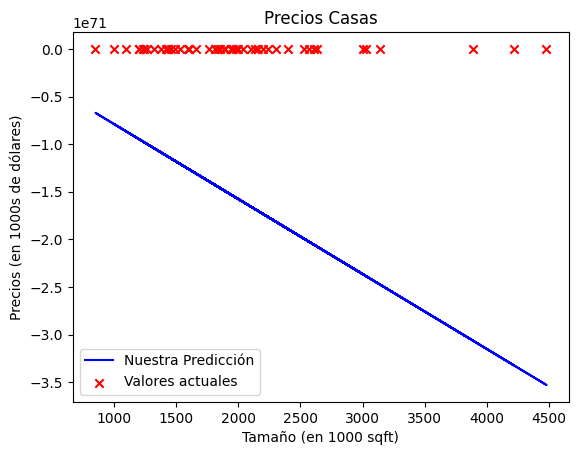

In [14]:
tmp_f_wb = compute_model_output(size_array_train, w_final, b_final)

# Plot our model prediction
plt.plot(size_array_train, tmp_f_wb, c='b',label='Nuestra Predicción')

# Plot the data points
plt.scatter(size_array_train, price_array_train, marker='x', c='r',label='Valores actuales')

# Set the title
plt.title("Precios Casas")
# Set the y-axis label
plt.ylabel('Precios (en 1000s de dólares)')
# Set the x-axis label
plt.xlabel('Tamaño (en 1000 sqft)')
plt.legend()
plt.show()

**Respuesta esperada:**

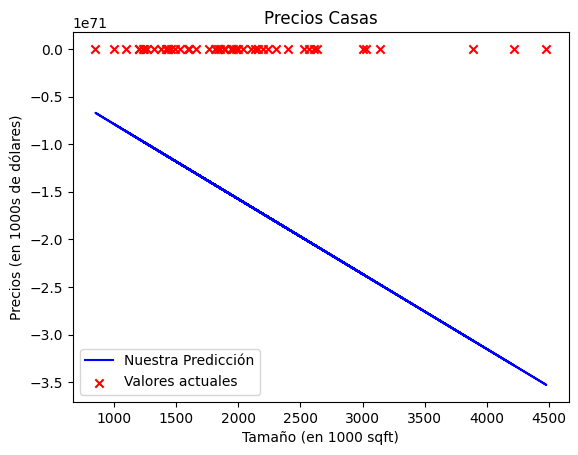

## Ahora veamos nuestros w,b con 1000 iteraciones



Prueba cambiando los valores de iteraciones y la tasa de aprendizaje

In [15]:
# parámetros iniciales
w_init = 0
b_init = 0
# número interaciones
iterations = 10000
# tasa de aprendizaje
tmp_alpha = 1.0e-10
# run gradient descent
w_final, b_final = gradient_descent(size_array_train , price_array_train, w_init, b_init, tmp_alpha,
                                                    iterations, compute_cost, compute_gradient)
print(f"(w,b) Tu modelo encontró: ({w_final:8.4f},{b_final:8.4f})")
print(f"(w,b) La respuesta esperada es: (163.7568,  0.0804)")

(w,b) Tu modelo encontró: (163.7568,  0.0804)
(w,b) La respuesta esperada es: (163.7568,  0.0804)


**Así se vería la gráfica**

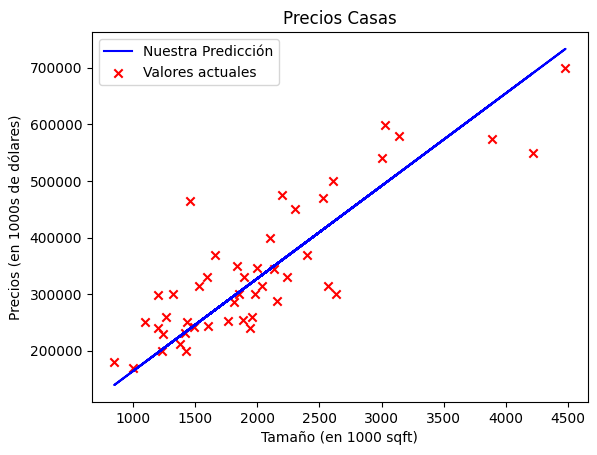

In [16]:
tmp_f_wb = compute_model_output(size_array_train, w_final, b_final)

# Plot our model prediction
plt.plot(size_array_train, tmp_f_wb, c='b',label='Nuestra Predicción')

# Plot the data points
plt.scatter(size_array_train, price_array_train, marker='x', c='r',label='Valores actuales')

# Set the title
plt.title("Precios Casas")
# Set the y-axis label
plt.ylabel('Precios (en 1000s de dólares)')
# Set the x-axis label
plt.xlabel('Tamaño (en 1000 sqft)')
plt.legend()
plt.show()

**Respuesta esperada:**

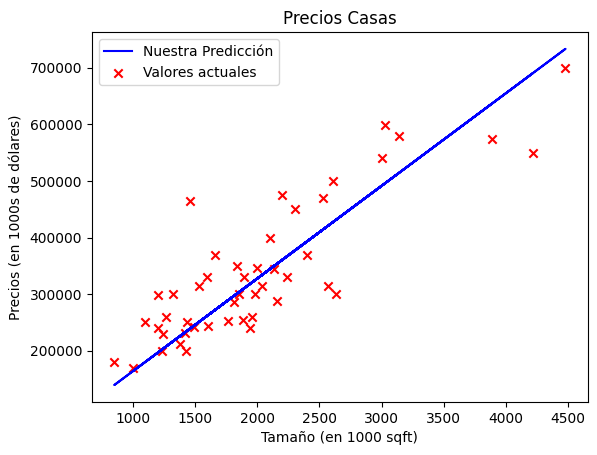

## Ahora podemos hacer predicciones:

In [17]:
print(f"Predicción para una casa de 1000 sqft {w_final*1000 + b_final:0.1f} mil dólares")
print(f"Predicción para una casa de 1200 sqft {w_final*1200 + b_final:0.1f} mil dólares")
print(f"Predicción para una casa de 2000 sqft {w_final*2000 + b_final:0.1f} mil dólares")
print(f"Predicción para una casa de 4500 sqft {w_final*4500 + b_final:0.1f} mil dólares")

Predicción para una casa de 1000 sqft 163756.9 mil dólares
Predicción para una casa de 1200 sqft 196508.2 mil dólares
Predicción para una casa de 2000 sqft 327513.7 mil dólares
Predicción para una casa de 4500 sqft 736905.7 mil dólares


**Las respuestas esperadas son:**

- Predicción para una casa de 1000 sqft 163756.9 mil dólares

- Predicción para una casa de 1200 sqft 196508.2 mil dólares

- Predicción para una casa de 2000 sqft 327513.7 mil dólares

- Predicción para una casa de 4500 sqft 736905.7 mil dólares